In [ ]:
!pip install ultralytics roboflow

import ultralytics
ultralytics.checks()

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Y9sphlbU9DIoj8q5Bzk2")
project = rf.workspace("dlalitermproject").project("park-lot")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to park-lot-1 in yolov8:: 100%|██████████| 6933/6933 [00:04<00:00, 1590.34it/s]


In [ ]:
from ultralytics import YOLO

In [ ]:
import os
import shutil
import random
import yaml

dataset_path = "/content/park-lot-1"
train_img_dir = os.path.join(dataset_path, "train/images")
train_lbl_dir = os.path.join(dataset_path, "train/labels")

val_img_dir = os.path.join(dataset_path, "valid/images")
val_lbl_dir = os.path.join(dataset_path, "valid/labels")

# 20% of the train data will be valid data
split_ratio = 0.2

os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)

images = [f for f in os.listdir(train_img_dir) if f.endswith((".jpg", ".jpeg", ".png"))]
num_to_move = int(len(images) * split_ratio)

# it will be picked random
random.seed(42)
files_to_move = random.sample(images, num_to_move)


for img_file in files_to_move:
    base_name = os.path.splitext(img_file)[0]
    lbl_file = base_name + ".txt"

    # Source
    src_img = os.path.join(train_img_dir, img_file)
    src_lbl = os.path.join(train_lbl_dir, lbl_file)

    # Target
    dst_img = os.path.join(val_img_dir, img_file)
    dst_lbl = os.path.join(val_lbl_dir, lbl_file)

    shutil.move(src_img, dst_img)
    if os.path.exists(src_lbl):
        shutil.move(src_lbl, dst_lbl)

yaml_path = os.path.join(dataset_path, "data.yaml")

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

# Updating the paths
data["train"] = "/content/park-lot-1/train/images"
data["val"]   = "/content/park-lot-1/valid/images"
data["test"]  = "/content/park-lot-1/test/images"

with open(yaml_path, "w") as f:
    yaml.dump(data, f)

print("data.yaml has been updated!")

data.yaml has been updated!


In [ ]:
model = YOLO('yolov8n-seg.pt')

In [ ]:
results = model.train(
    data="/content/park-lot-1/data.yaml",
    epochs=50,
    imgsz=640,
    name="park_segmentation_v2",
    project="/content/runs/segment",
    verbose=True
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/park-lot-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=park_segmentation_v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

In [ ]:
best_model = YOLO("/content/runs/segment/park_segmentation_v2/weights/best.pt")

In [ ]:
test_results = best_model.val(split="test", save_json=True)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2885.1±966.1 MB/s, size: 264.6 KB)
val: Scanning /content/park-lot-1/test/labels... 346 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 346/346 1.6Kit/s 0.2s
val: New cache created: /content/park-lot-1/test/labels.cache
requirements: Ultralytics requirement ['faster-coco-eval>=1.6.7'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 2 packages in 226ms
Prepared 1 package in 35ms
Installed 1 package in 3ms
 + faster-coco-eval==1.7.0

requirements: AutoUpdate success ✅ 1.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 1.6it/s 13.6s
   

In [ ]:
import os
import shutil
import glob
import random
from ultralytics import YOLO
from google.colab import drive

In [ ]:
if not os.path.exists("/content/drive"):
    drive.mount("/content/drive")

drive_folder = "/content/drive/MyDrive/Park_Proje_Sonuclar"
os.makedirs(drive_folder, exist_ok=True)

#Train results
train_run_dir = "/content/runs/segment/park_segmentation_v2"

#Test results
val_run_dir = "/content/runs/segment/val"

#Save model to drive
source_model = os.path.join(train_run_dir, "weights/best.pt")
if os.path.exists(source_model):
    shutil.copy(source_model, os.path.join(drive_folder, "best_model.pt"))
    print("Model has been copied.")
else:
    print("Model copy failed.")

Mounted at /content/drive
Model has been copied.


Results saved to /content/drive/MyDrive/Park_Ornek_Fotolar/predictions
 Prediction: 1114_png_jpg.rf.a0370cc4f30b8bce84d9b183baa14a66.jpg


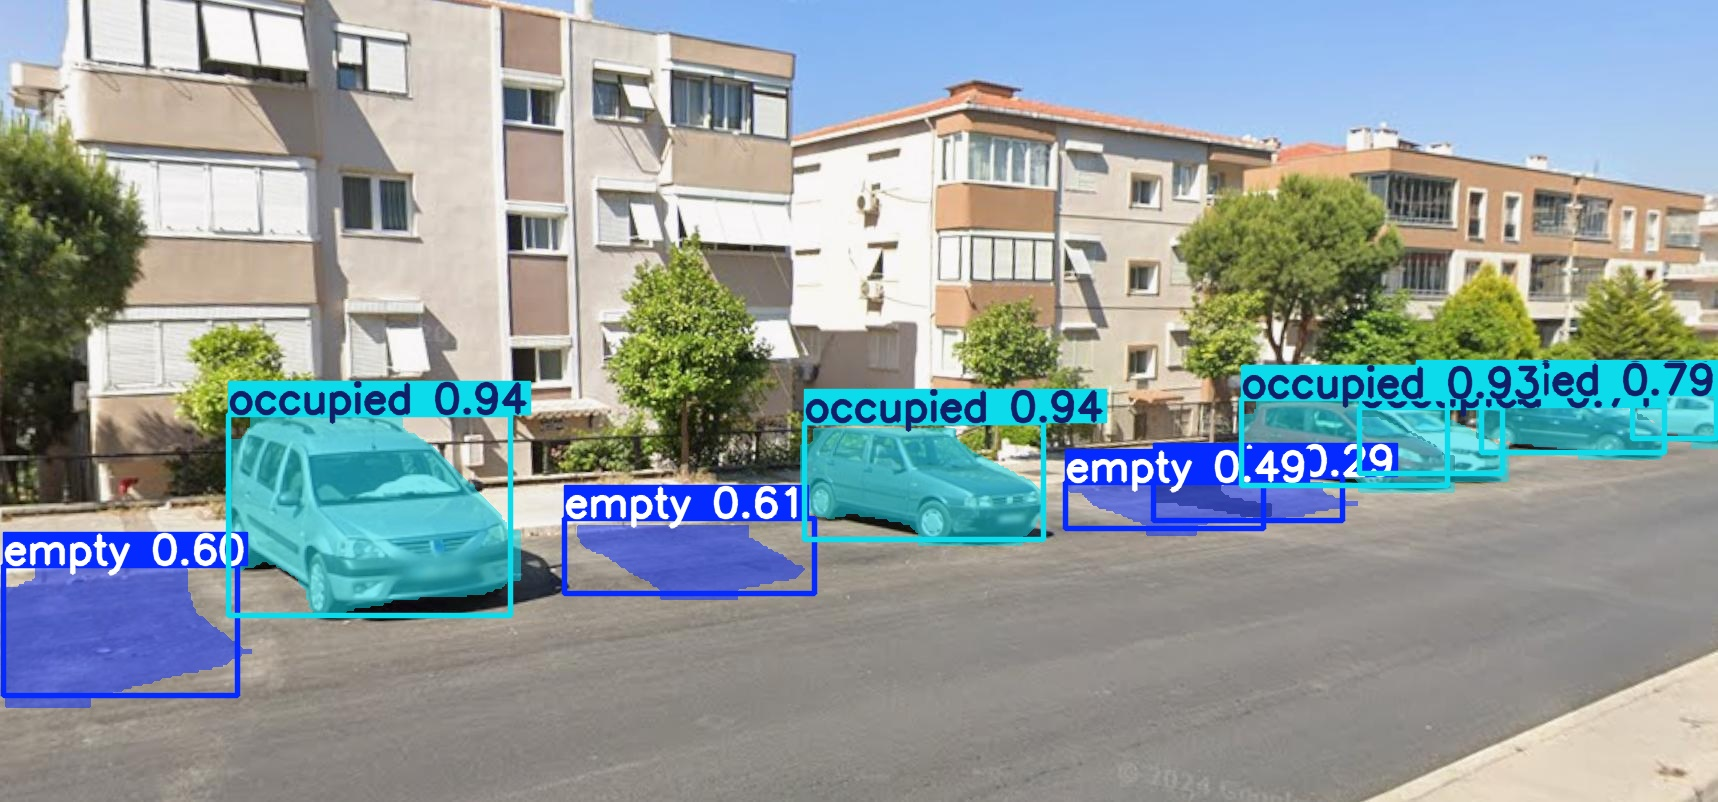

 Prediction: 1211_png_jpg.rf.f4458f6d1cf6d71c64d033a70a8c2792.jpg


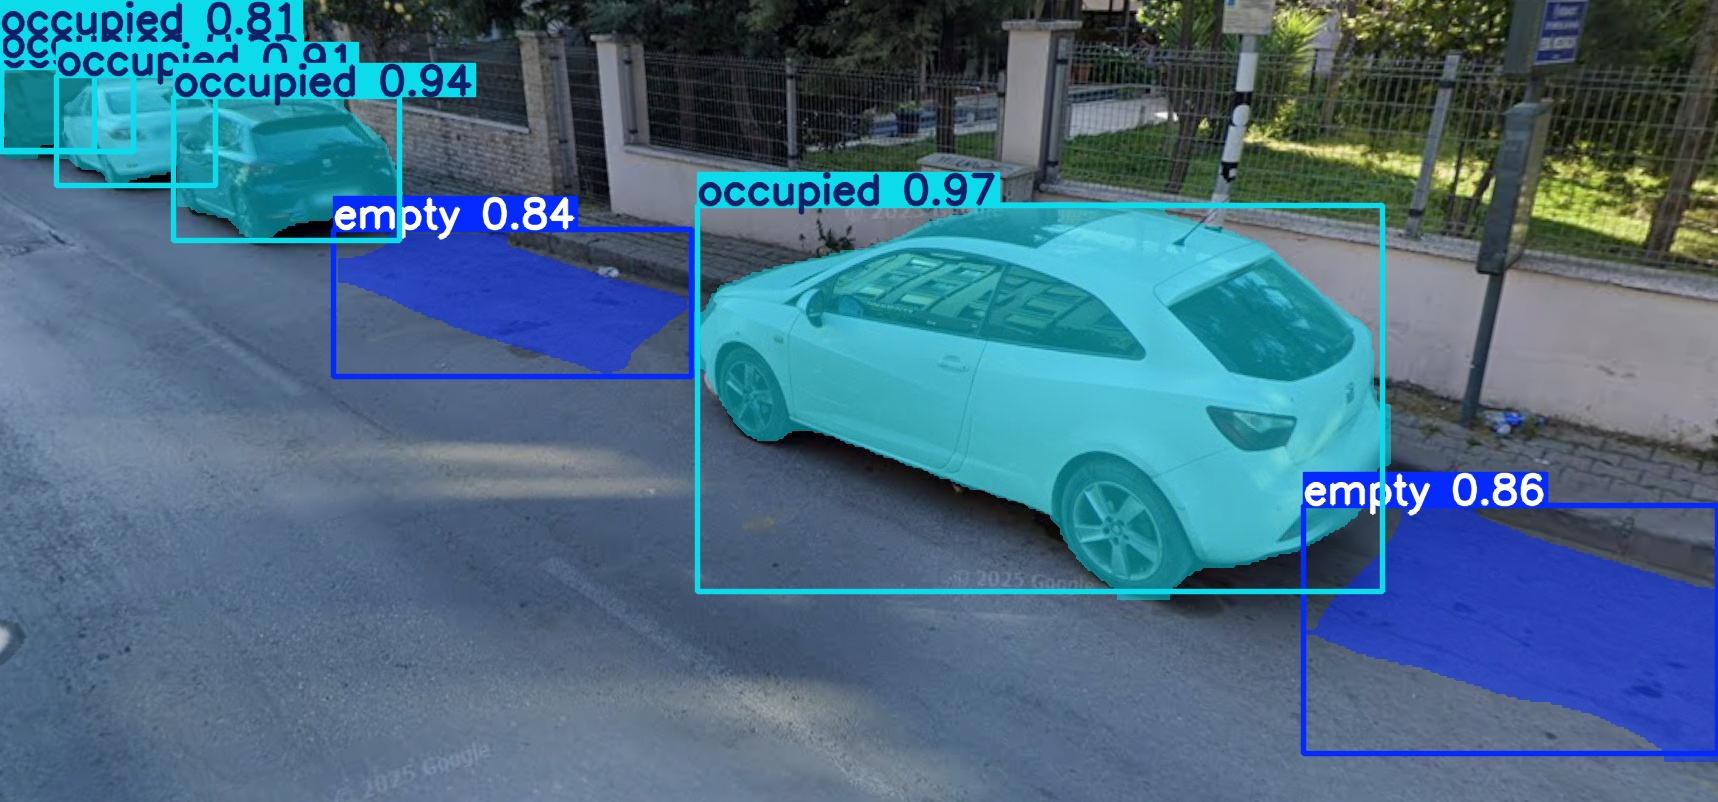

 Prediction: Ekran-Resmi-2025-12-10-19-49-48_png_jpg.rf.46a9d93f1a4dc8a753d22a806ee3ff94.jpg


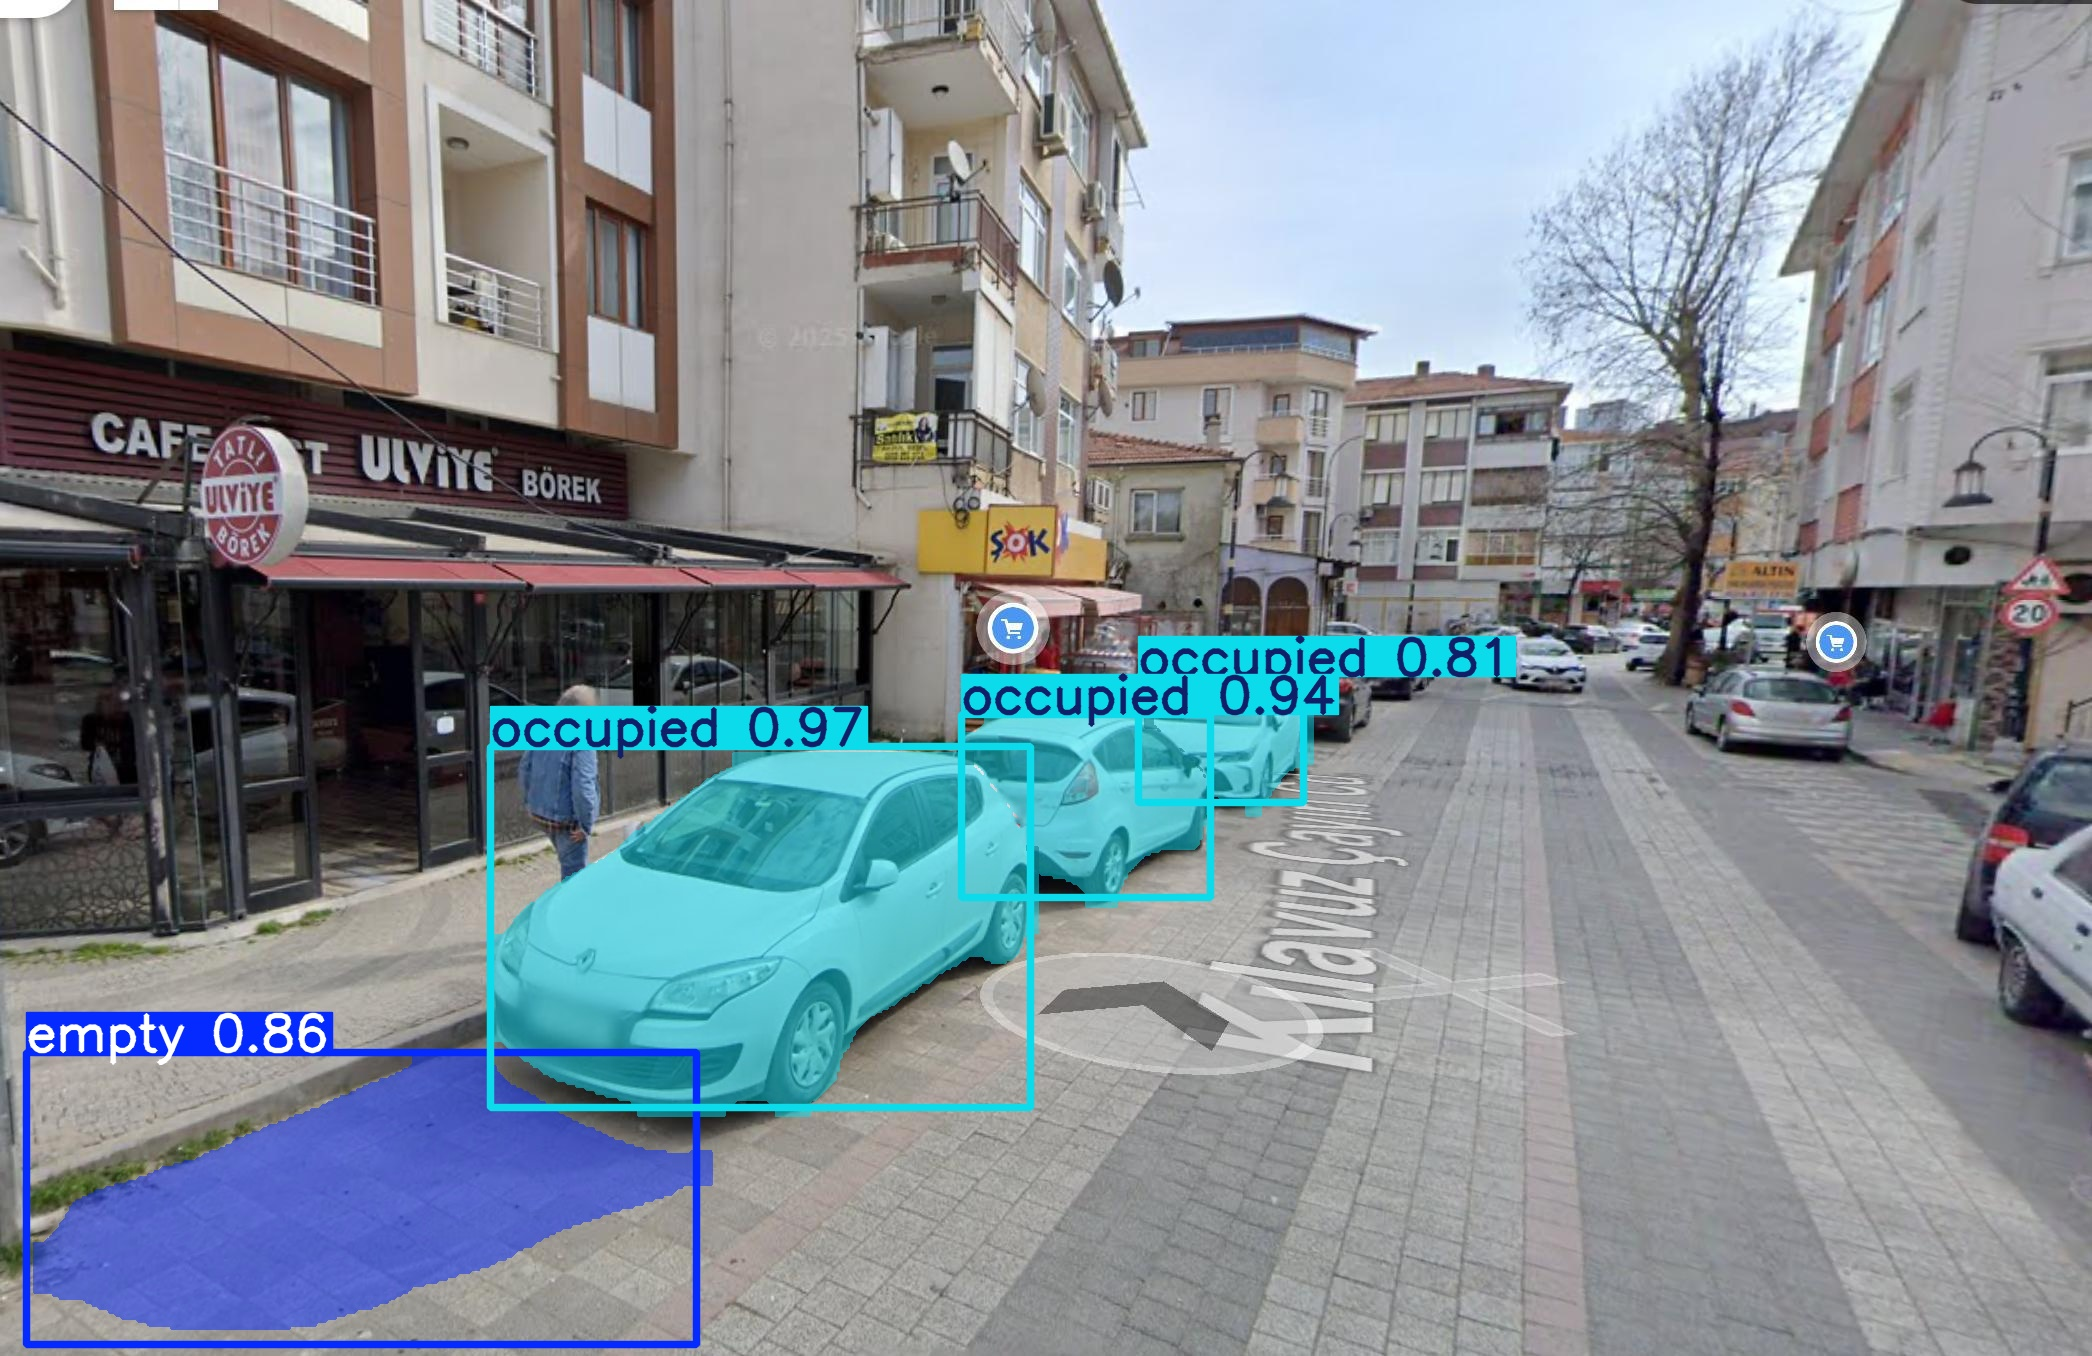

 Prediction: Ekran-Resmi-2025-12-10-19-29-29_png_jpg.rf.71651958860014c627bdb9f5e2ca7971.jpg


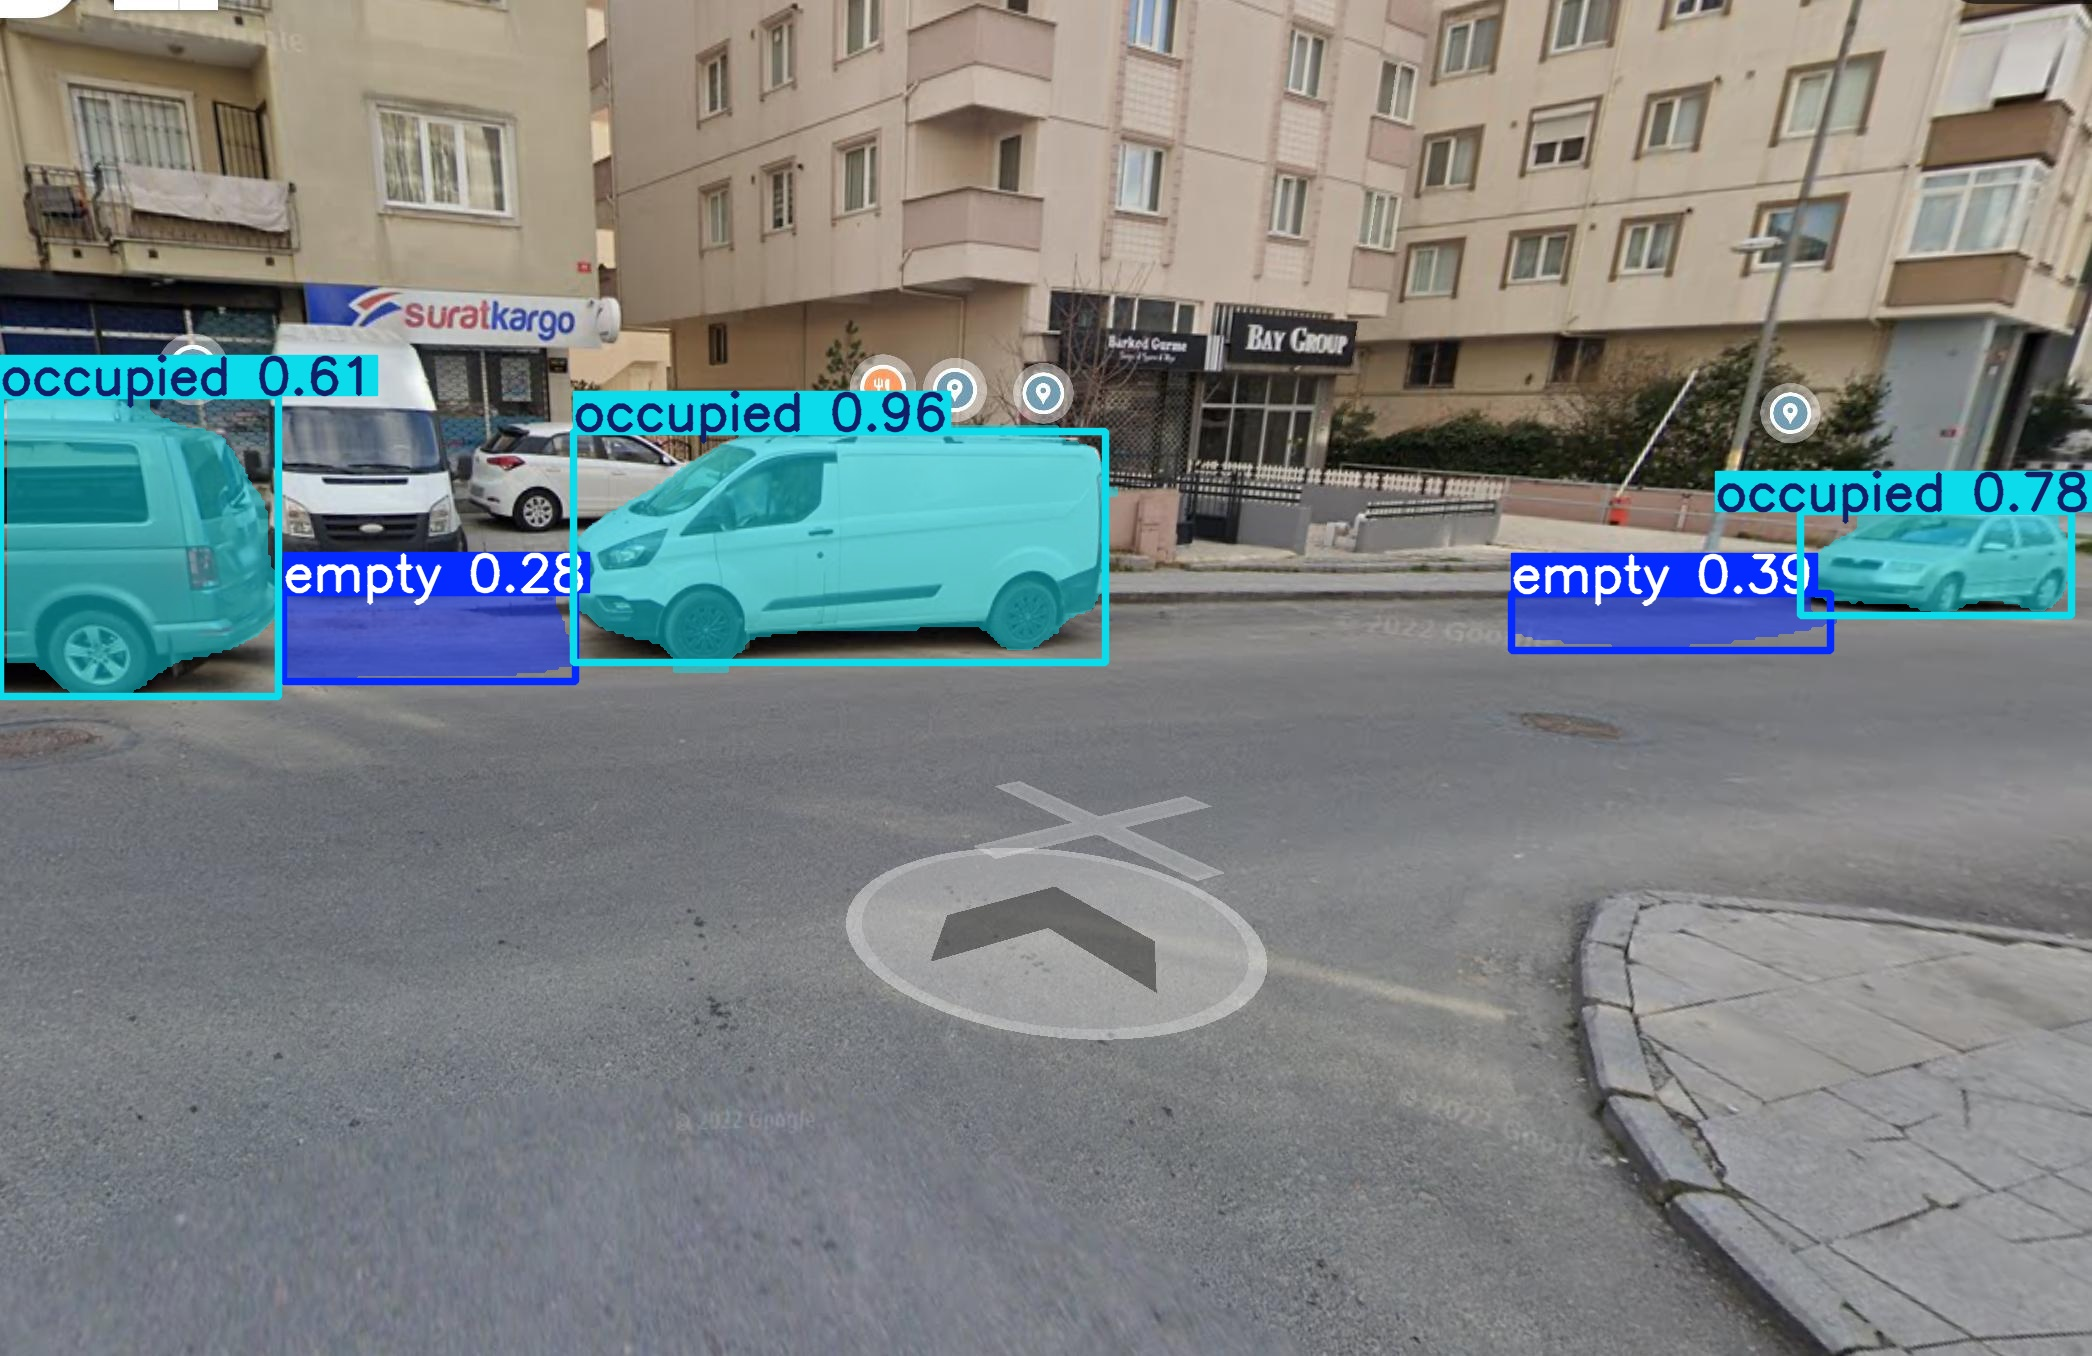

 Prediction: Ekran-goruntusu-2025-12-20-110346_png_jpg.rf.2d7e06389cbebd00d5de511ef3fa4fbb.jpg


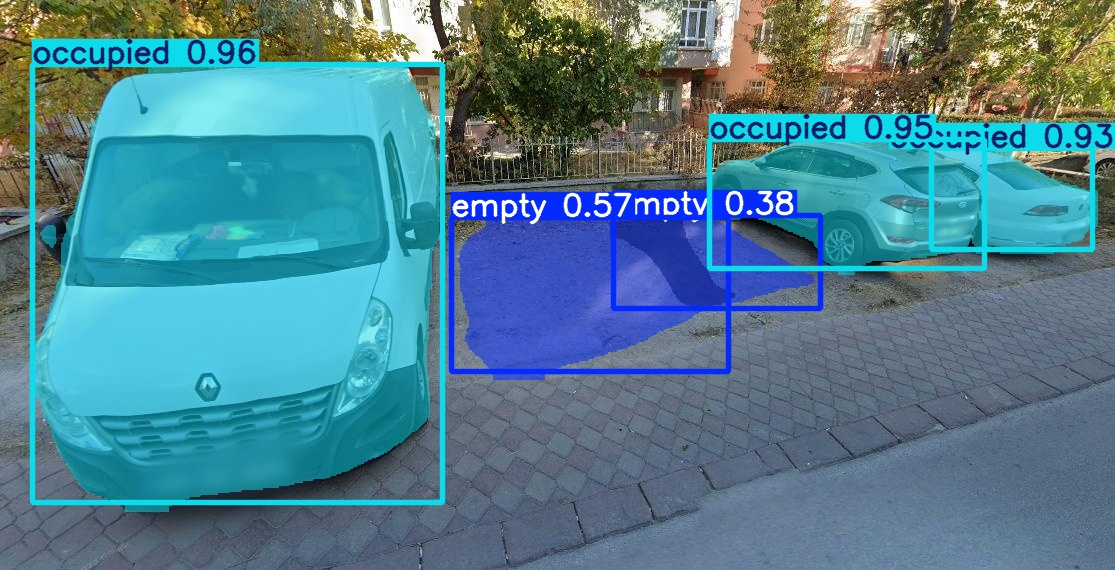

 Prediction: Ekran-Resmi-2025-12-11-15-32-33_png_jpg.rf.dfd5100917d03dad5ca54c8095b1d50a.jpg


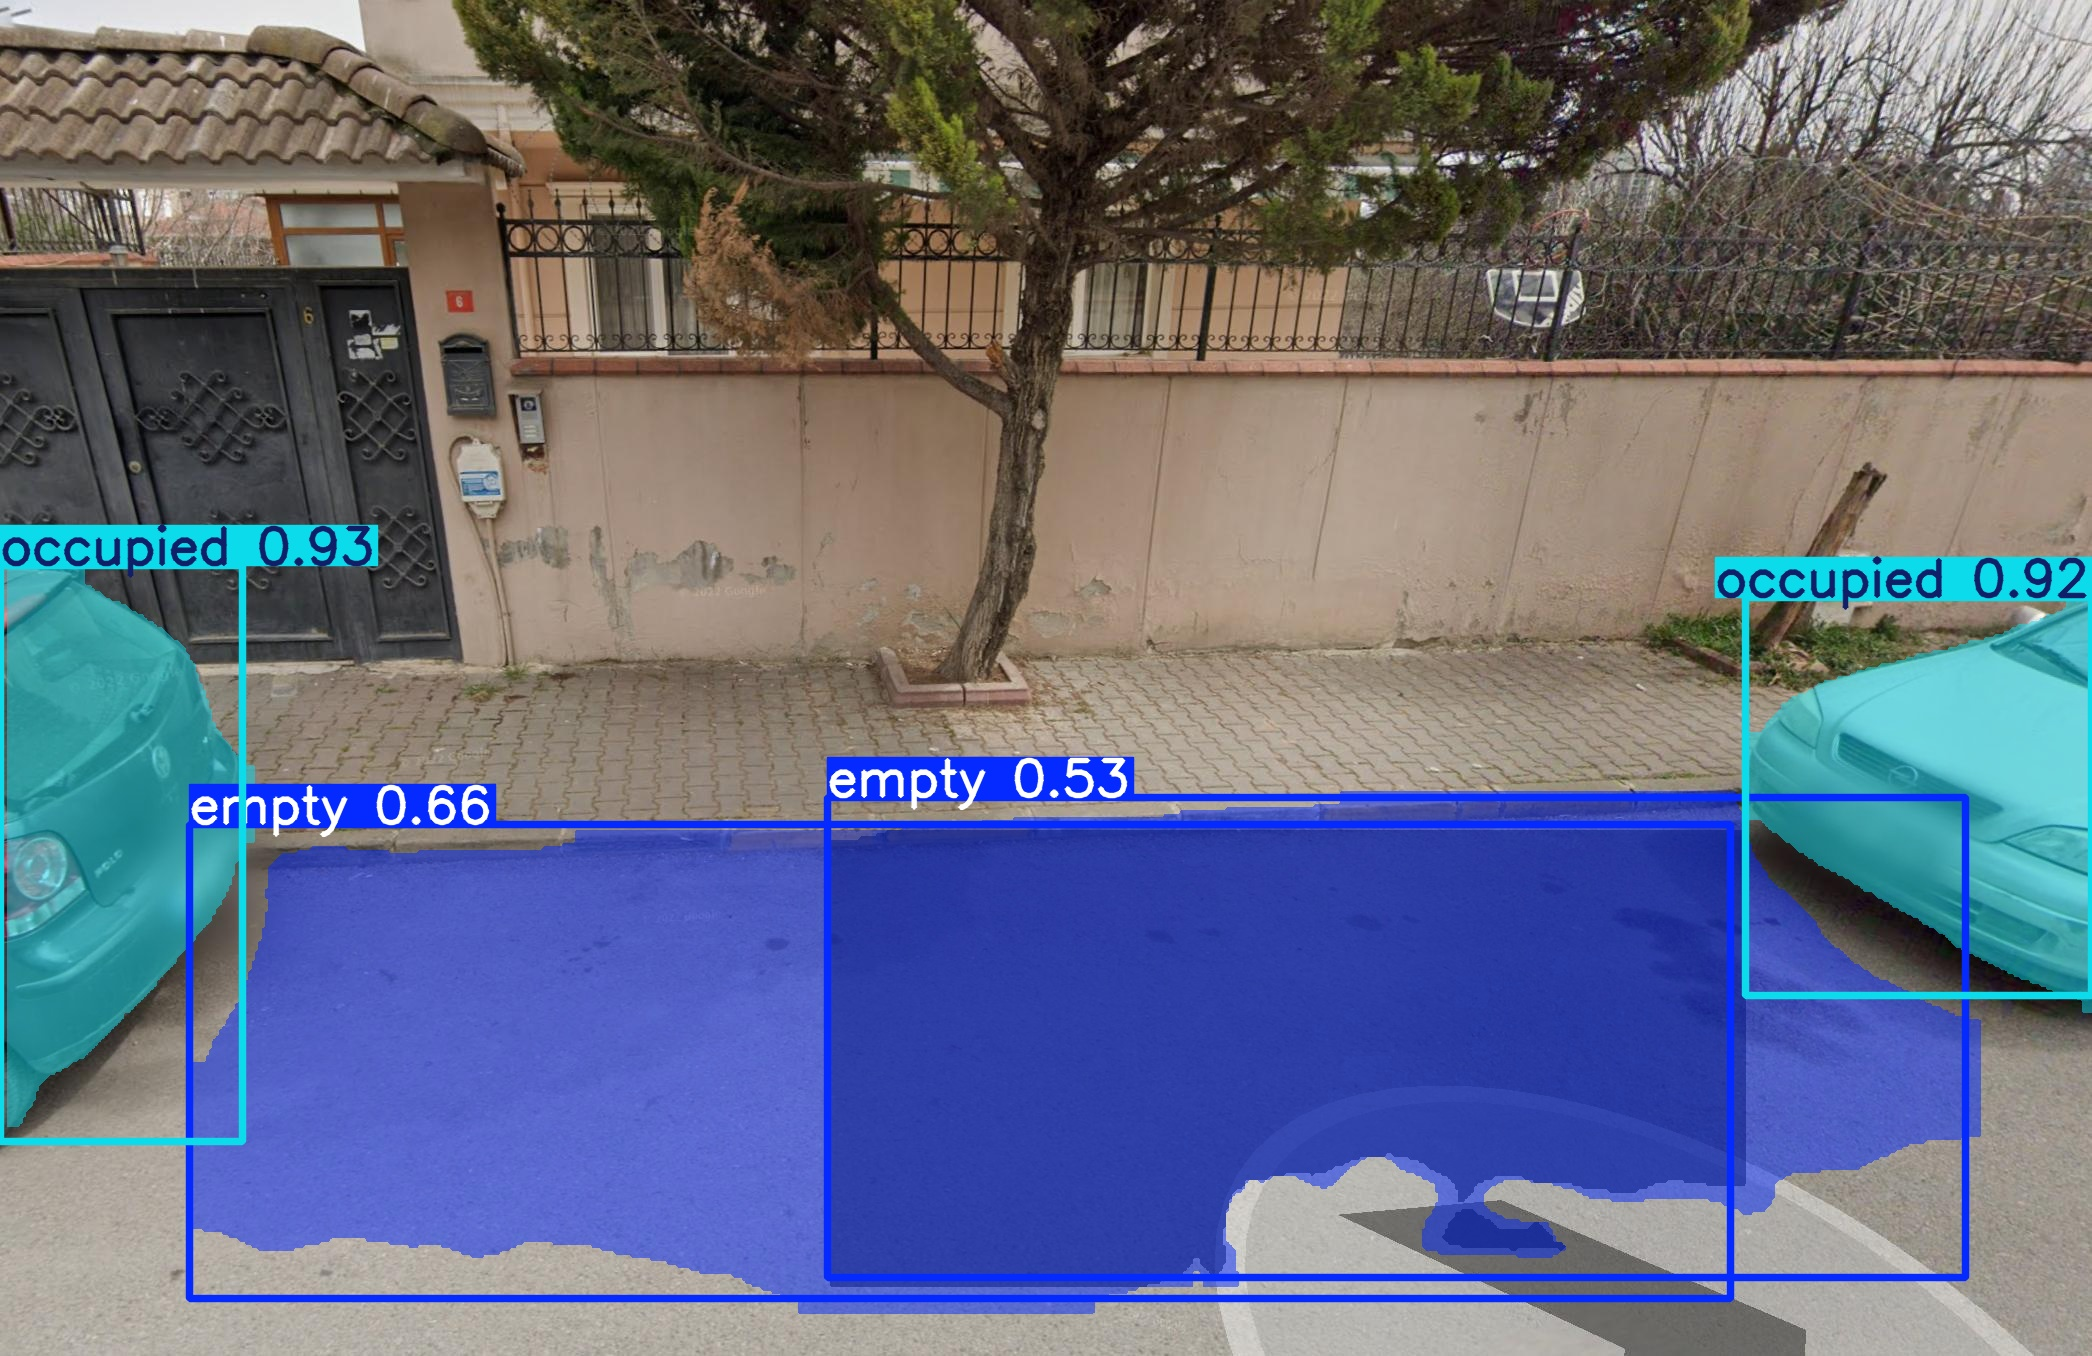

In [ ]:
from IPython.display import Image, display
model_path = "/content/runs/segment/park_segmentation_v2/weights/best.pt"
model = YOLO(model_path)

test_images = glob.glob("/content/park-lot-1/test/images/*.jpg")
if test_images:
    selected_imgs = random.sample(test_images, min(len(test_images), 6))

    save_dir = "/content/drive/MyDrive/Park_Ornek_Fotolar"

    model.predict(
        selected_imgs,
        save=True,
        project=save_dir,
        name="predictions",
        exist_ok=True,
        verbose=False
    )

    final_path = os.path.join(save_dir, "predictions")
    for img_file in os.listdir(final_path):
        if img_file.endswith(".jpg"):
            print(f" Prediction: {img_file}")
            display(Image(filename=os.path.join(final_path, img_file), width=600))
else:
    print("There is no photos")

(Loss & mAP):


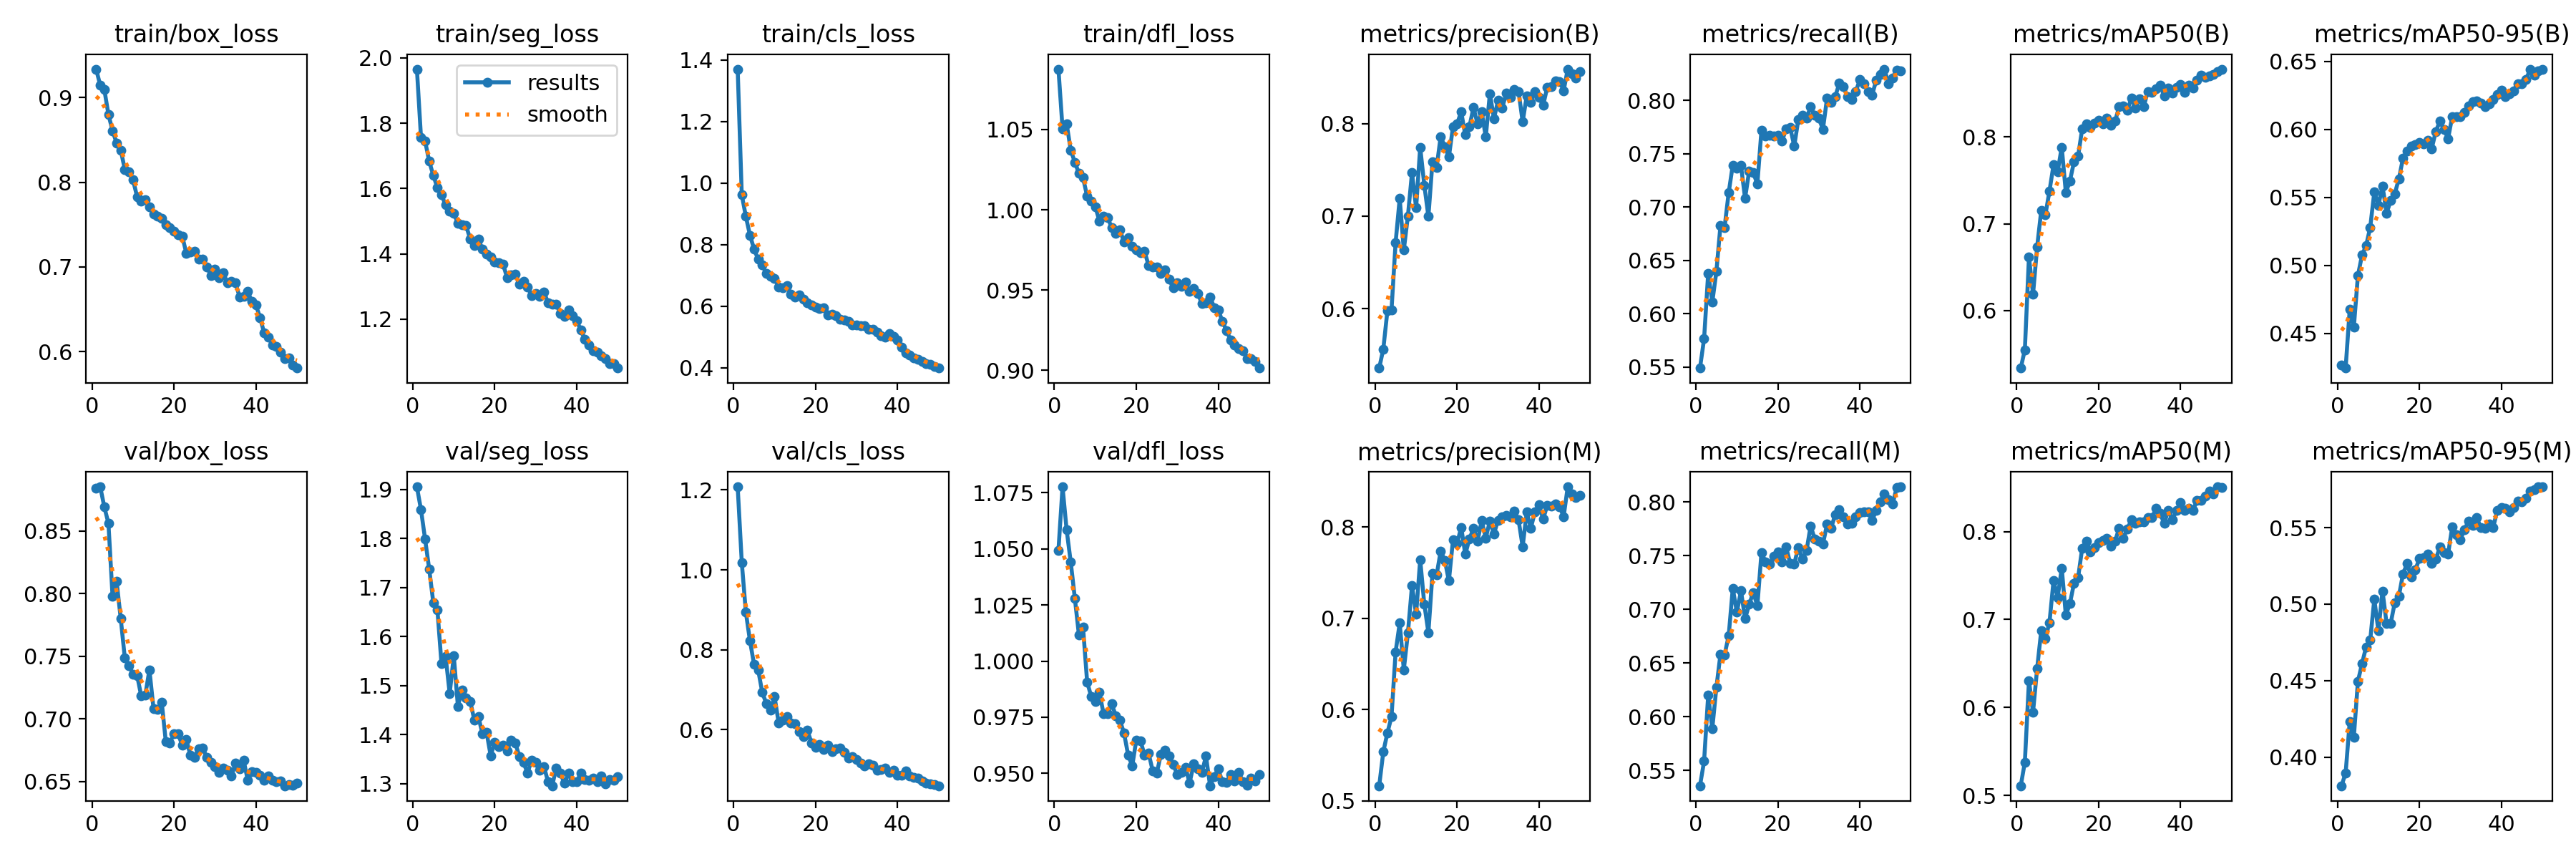

In [ ]:
graph_path = "/content/runs/segment/park_segmentation_v2/results.png"
drive_graph_dest = "/content/drive/MyDrive/park_egitim_grafigi.png"

if os.path.exists(graph_path):
    print("(Loss & mAP):")
    display(Image(filename=graph_path, width=800))

    # Copy to drive
    shutil.copy(graph_path, drive_graph_dest)
else:
    print("no graph to show")

In [ ]:
import time
import os
import glob
from google.colab import drive
!pip install ultralytics roboflow -q
from ultralytics import YOLO
from roboflow import Roboflow

#connect to drive for the model
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/Park_Proje_Sonuclar/best_model.pt'

if not os.path.exists(model_path):
    print("Model not found")
else:
    print(f"Model found: {model_path}")

    try:
        rf = Roboflow(api_key="Y9sphlbU9DIoj8q5Bzk2")
        project = rf.workspace("dlalitermproject").project("park-lot")
        version = project.version(1)
        dataset = version.download("yolov8")
    except:
        print("error")

    model = YOLO(model_path)

    test_images = glob.glob('/content/park-lot-1/test/images/*.jpg')

    if len(test_images) > 0:

        # Warm-up for the GPU
        print("🔥 GPU Isınıyor (İlk 10 kare)...")
        model.predict(test_images[:10], verbose=False)

        # real test
        start_time = time.time()

        #verbose false to no time to waste for writing
        results = model.predict(test_images, verbose=False)

        end_time = time.time()

        total_time = end_time - start_time
        fps = len(test_images) / total_time

        print("-" * 40)
        print(f"⏱️ Toplam Süre: {total_time:.2f} saniye")
        print(f"🖼️ İşlenen Kare: {len(test_images)}")
        print(f"🚀 ORTALAMA HIZ (FPS): {fps:.2f}")
        print("-" * 40)

        if fps > 30:
            print("✅ Sonuç: MÜKEMMEL! Gerçek zamanlı (Real-time) çalışır.")
        elif fps > 10:
            print("✅ Sonuç: İYİ. Video akışında hafif gecikmeli çalışır.")
        else:
            print("⚠️ Sonuç: YAVAŞ. Optimizasyon gerekebilir.")

    else:
        print("❌ Test klasöründe resim bulunamadı. Veri seti indirilememiş olabilir.")

Model found: /content/drive/MyDrive/Park_Proje_Sonuclar/best_model.pt
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to park-lot-1 in yolov8:: 100%|██████████| 6933/6933 [00:02<00:00, 2621.91it/s]


Toplam 346 resim üzerinde test yapılıyor...
🔥 GPU Isınıyor (İlk 10 kare)...
----------------------------------------
⏱️ Toplam Süre: 11.67 saniye
🖼️ İşlenen Kare: 346
🚀 ORTALAMA HIZ (FPS): 29.66
----------------------------------------
✅ Sonuç: İYİ. Video akışında hafif gecikmeli çalışır.
